In [1]:
import pandas as pd

df_listings = pd.read_csv("../data/raw/listings.csv")
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20241206031559,2024-12-07,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20241206031559,2024-12-09,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.96,4.59,7510402838018,f,1,1,0,0,2.26
2,7397,https://www.airbnb.com/rooms/7397,20241206031559,2024-12-08,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,2,2,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20241206031559,2024-12-09,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20241206031559,2024-12-09,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


In [2]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Supprimer certaines colonnes dupliquées
mettre les données host dans une dataframe differente et supprimer les données de la dataframe principale `df_listings`.

In [3]:
df_host = df_listings[['host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']]
print("df_host shape: ", df_host.shape)
df_host = df_host.drop_duplicates(subset='host_id')
print("df_host shape after drop duplicates: ", df_host.shape)
df_host = df_host.reset_index(drop=True)

df_host shape:  (91031, 18)
df_host shape after drop duplicates:  (67331, 18)


In [6]:
df_listings.drop(columns=['neighbourhood','host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified'], inplace=True)

# Analyse des prix de loyer à Paris
Pour cela, nous allons commencer par traiter la colonne prix afin de supprimer le '$' et la virgule. Enfin nous converstissons la colonne en type float (nombre décimal).


In [7]:
df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_listings['price'].head()


0    100.0
1     88.0
2    136.0
3      NaN
4     75.0
Name: price, dtype: float64

In [ ]:
df_listings[["neighbourhood_cleansed","price"]]

,neighbourhood_cleansed,price
0,Observatoire,100.0
1,Hôtel-de-Ville,88.0
2,Hôtel-de-Ville,136.0
3,Opéra,NaN
4,Louvre,75.0
...,...,...
91026,Buttes-Chaumont,100.0
91027,Ménilmontant,80.0
91028,Popincourt,818.0
91029,Vaugirard,840.0


#### Visualiser le prix en fonction du quartier avec matplotlib et seaborn

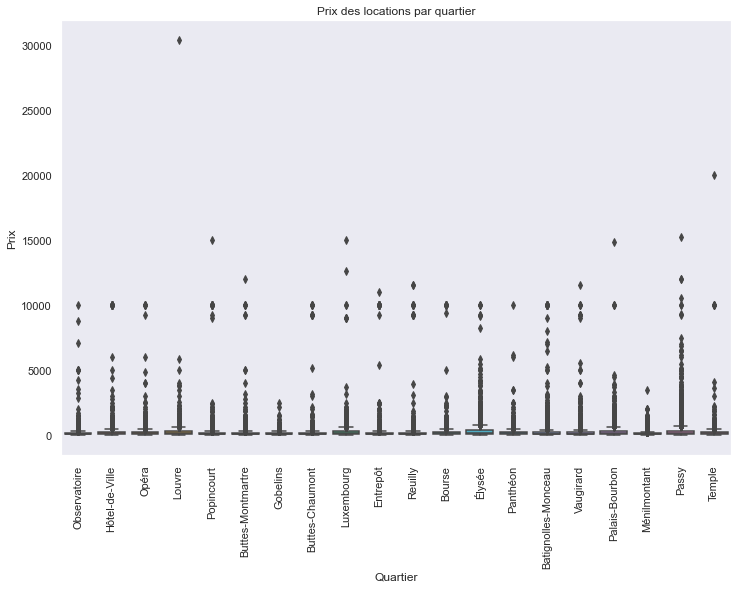

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_theme(style="dark")
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_listings)
plt.title('Prix des locations par quartier')
plt.xticks(rotation=90)
plt.xlabel('Quartier')
plt.ylabel('Prix')
plt.show()


### Enregistrer les fichiers traités pour les visualisations

In [12]:
df_listings.to_csv("../data/processed/listings.csv", index=False)
df_host.to_csv("../data/processed/hosts.csv", index=False)